# Cycles limites

In [84]:
# import useful python packages
import numpy as np # for vector and matrix manipulations
import matplotlib.pyplot as plt # for plotting
import seaborn as sb # for plotting nicer
from scipy.integrate import solve_ivp

sb.set_theme(context="notebook", style="ticks")

Find mode information about Scipy's solve_ivp in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). 

## Exemple 

In [301]:
def exemple(t, z, mu=0.5):
    x, y = z
    r2 = x**2 + y**2  # r^2 = x^2 + y^2

    # Define the derivatives
    dxdt = (1 - r2) * x + mu * x - y
    dydt = (1 - r2) * y + mu * x + x

    return [dxdt, dydt]

def exemple_polaire(t, z, mu=0.5):
    r, theta = z
    
    # Define the derivatives
    drdt = r * (1 - r**2) + mu * r * np.cos(theta)
    dthetadt = 1

    return [drdt, dthetadt]

### Condition initiale unique

In [306]:
# system parameters
mu = 0.5

#y0 = np.random.random(size=2) * 3 - 1.5 #np.array([0.4, 1.3])  # Initial condition
y0 = np.random.random(size=2) * 3  #np.array([0.4, 1.3])  # Initial condition

# integration parameters
t_end = 40 # End time
h = 0.01  # Step size
t_span = (0, t_end)
t_eval = np.arange(0, t_end + h, h)

# integrate
solution = solve_ivp(exemple_polaire, t_span, y0, method='RK45', t_eval=t_eval, args=(mu,))

t_values = solution['t']
states = solution['y']

rs = states[0]
thetas = states[1]
xs = rs * np.cos(thetas)
ys = rs * np.sin(thetas)

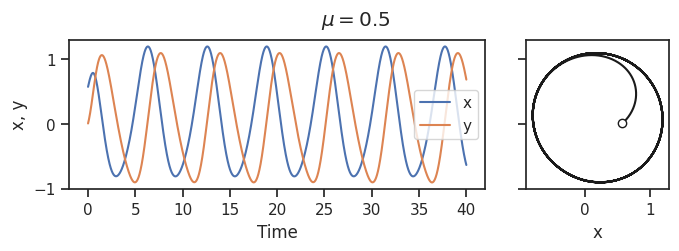

In [307]:
# Create a figure and axis object
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(7, 2.4), width_ratios=[2, 1], layout="constrained", sharey=True)

# Plot the results
#ax.plot(t_values, states[0], "-", label="x")
#ax.plot(t_values, states[1], "-", label="y")
ax.plot(t_values, xs, "-", label="x")
ax.plot(t_values, ys, "-", label="y")

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('x, y')

ax.legend()

ax2.plot(xs, ys, "k-")
ax2.plot(xs[0], ys[0], "ko", mfc="w")

ax2.set_xlabel('x')
ax2.set_aspect("equal")


plt.suptitle(f"$\mu = {mu}$")

# Show the plot
plt.show()


In [308]:
# compute vector field
vmax = 1.5 # grid limit
dv = 0.2 # grid resolution
X, Y = np.meshgrid(np.arange(-vmax, vmax, dv), np.arange(-vmax, vmax, dv))

r2 = X**2 + Y**2
U = (1 - r2) * X + mu * X - Y
V = (1 - r2) * Y + mu * X + X

# simulate 
solution = solve_ivp(exemple_polaire, t_span, y0, method='RK45', t_eval=t_eval, args=(mu,))

t_values = solution['t']
states = solution['y']

rs = states[0]
thetas = states[1]
xs = rs * np.cos(thetas)
ys = rs * np.sin(thetas)

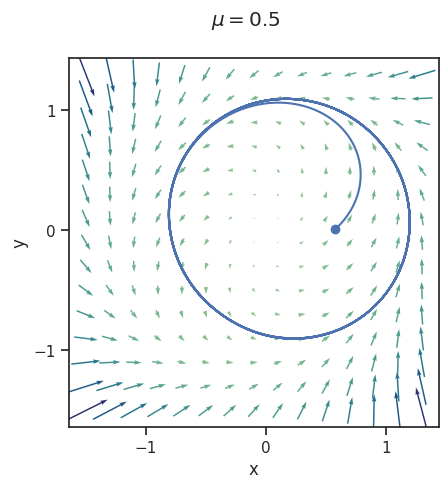

In [309]:
# plot 

fig, ax = plt.subplots()

# plot vector field
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M, cmap="crest", pivot="middle")

# plot trajectory
ax.plot(xs, ys, "-")
ax.scatter(xs[0], ys[0])

ax.set_aspect("equal")
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_ylabel("y")
ax.set_xlabel("x")

plt.suptitle(f"$\mu = {mu}$")

#plt.grid()

plt.show()

### Conditions initiales multiples

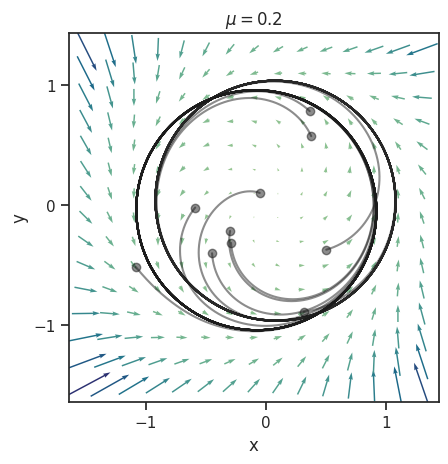

In [297]:
# system parameters
mu = 0.2

n_reps = 10 # number of initial conditions

y0s = np.random.random(size=(n_reps, 2)) * 3 - 1.5 #np.array([0.4, 1.3])  # Initial condition

# compute vector field
vmax = 1.5 # grid limit
dv = 0.2 # grid resolution
X, Y = np.meshgrid(np.arange(-vmax, vmax, dv), np.arange(-vmax, vmax, dv))

r2 = X**2 + Y**2
U = (1 - r2) * X + mu * X - Y
V = (1 - r2) * Y + mu * X + X

fig, ax = plt.subplots()

# plot vector field
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M, cmap="crest", pivot="middle")


# integration parameters
t_end = 40 # End time
h = 0.001  # Step size
t_span = (0, t_end)
t_eval = np.arange(0, t_end + h, h)


for i in range(n_reps) : 

    y0 = y0s[i]
    # simulate 
    solution = solve_ivp(exemple_polaire, t_span, y0, method='RK45', t_eval=t_eval, args=(mu,))
    
    t_values = solution['t']
    states = solution['y']

    rs = states[0]
    thetas = states[1]
    xs = rs * np.cos(thetas)
    ys = rs * np.sin(thetas)

    
    # plot trajectory
    ax.plot(xs, ys, "-", alpha=0.5, c="k")
    ax.scatter(xs[0], ys[0], alpha=0.5, c="k")

ax.set_aspect("equal")
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_ylabel("y")
ax.set_xlabel("x")

ax.set_title(f"$\mu = {mu}$")

plt.show()


## Glycolyse

In [310]:
def glycolysis(t, state, a=1, b=1):
    x, y = state

    # Define the derivatives
    dxdt = - x + a*y + x**2 * y
    dydt = b - a*y - x**2 * y

    return [dxdt, dydt]

### Condition initiale unique

In [318]:
# system parameters
a = 0.01
b = 0.8

y0 = np.random.random(size=2) * 2 #np.array([0.4, 1.3])  # Initial condition

# integration parameters
t_end = 60 # End time
h = 0.1  # Step size
t_span = (0, t_end)
t_eval = np.arange(0, t_end + h, h)

# integrate
solution = solve_ivp(glycolysis, t_span, y0, method='RK45', t_eval=t_eval, args=(a, b))

t_values = solution['t']
states = solution['y']

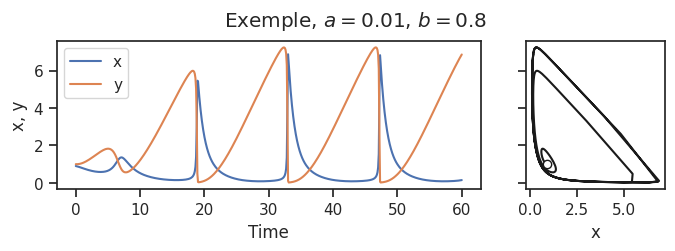

In [319]:
# Create a figure and axis object
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(7, 2.4), width_ratios=[2, 1], layout="constrained", sharey=True)

# Plot the results
ax.plot(t_values, states[0], "-", label="x")
ax.plot(t_values, states[1], "-", label="y")

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('x, y')

ax.legend()

ax2.plot(states[0], states[1], "k-")
ax2.plot(states[0,0], states[1,0], "ko", mfc="w")

ax2.set_xlabel('x')
ax2.set_aspect("equal")


plt.suptitle(f"Exemple, $a = {a}$, $b={b}$")

# Show the plot
plt.show()


### Conditions initiales multiples

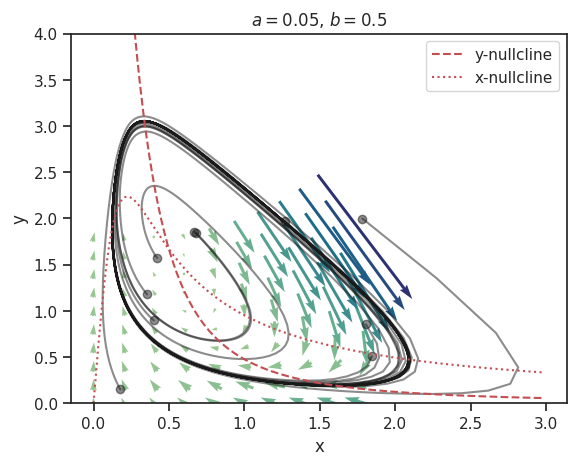

In [313]:
# system parameters
a = 0.05
v = 0.5

n_reps = 10 # number of initial conditions

y0s = np.random.random(size=(n_reps, 2)) * 2 #np.array([0.4, 1.3])  # Initial condition

# compute vector field
vmax = 2 # grid limit
dv = 0.2 # grid resolution
xs = np.arange(0, vmax, dv)
X, Y = np.meshgrid(xs, xs)

U = - X + a*Y + X**2 * Y
V = b - a*Y - X**2 * Y

fig, ax = plt.subplots()

# plot vector field
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M, cmap="crest", pivot="middle")


for i in range(n_reps) : 

    y0 = y0s[i]
    # simulate 
    solution = solve_ivp(glycolysis, t_span, y0, method='RK45', t_eval=t_eval, args=(a, b))
    
    t_values = solution['t']
    states = solution['y']
    
    # plot trajectory
    ax.plot(states[0], states[1], "-", alpha=0.5, c="k")
    ax.scatter(states[0, 0], states[1, 0], alpha=0.5, c="k")

#ax.set_aspect("equal")
ax.set_ylabel("y")
ax.set_xlabel("x")

# nullclines
xs = np.arange(0, 3, 0.01)
ax.plot(xs, b / (a + xs**2), "r--", label="y-nullcline")
ax.plot(xs, xs / (a + xs**2), "r:", label="x-nullcline")

ax.set_ylim([0, 4])

ax.set_title(f"$a = {a}$, $b={b}$")
ax.legend()

plt.show()
